<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcS6jBUR61qscLwSVP_y7EzIZAlakzEkQ5tJlQ&usqp=CAU" width="200" height="200" style="vertical-align:top">

# <center><font size=5>How Can We Give Our Students</font> <br /><font size=6>a Confidence Boost?</font></center>
<center><font size=3><i>By Marisol Hernandez</i></font></center>  
<center><font size=3><i>09/20/2020</i></font></center>




## Table of Contents

[I. Objective](#objective)  
[II. Libraries](#libraries)  
[III. Data Exploration](#data-exploration)   
[IV. Simple Linear Regression](#simple-linear-regressio)  
[V. Model Comparison](#model-comparison)  
[VI. Multiple Linear Regression](#multiple-linear-regression)  
[VII. Summary](#summary)  
[VIII. Recommendations](#recommendations)

## Objective  <a id='objective'></a>
---
It is essential that colleges and universities provide counseling and psychological services to their student body. Mental health difficulties can hinder a student's academic success; untreated mental health issues may affect a student's grades and in some cases lead to discontinued enrollment. An institution's commitment to counseling and psychological services is essential in helping students achieve academically, socially, and personally through culturally responsive mental health services.

Some ways colleges and universities can take action in mental health initiatives include *speaking about mental health to reduce stigmas*, *pursuing partnerships to ensure a campus-wide approach to mental health care*, and *investing in mental health services ensuring they're accessible to every student*. The most important thing an institution can do, however, is **listen and respond to student needs**. 

The best way students can communicate their mental health concerns comfortably is through an anonymous survey. The psychology department in the San Francisco County Office of Education conducted a study to analyze certain behaviors on college students. The objective of this study is to build a prediction model, using linear regression, that can inform stakeholders what variables contribute (whether positively or negatively) to a student's confidence level so that they can provide better services that can boost a student's confidence.

## Libraries <a id='libraries'></a>
The first step to every exploratory data analysis is to import all necessary libraries.

In [1]:
library(ggplot2)

## Data Exploration  <a id='data-exploration'></a>
---

### Read in the Data
I imported and read the CSV file into R as a dataframe called `personality`. Additionally, I printed the first 6 rows.

In [3]:
personality <- read.csv(file = "PersonalityTest2020.csv")
head(personality)

,VIBRANT,EXPLORE,LAID.BACK,REMORSEFUL,COMFORTING,LEVEL.HEADED,INSOCIALABLE,PRIORITIZABLE,SELF.ASSERTING,TEAM.PLAYER,⋯,APPROACHABLE,UNSTRUCTURED,MOODY,PHILOSOPHICAL,SENSITIVE,UNREPENTANT,REALIST,EMPATHIC,EMOTIONAL,CONFIDENT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,3.0,8.6,6.30,9.90000,7.200000,8.6000,10.00000,8.600000,9.000000,1.0,⋯,6.90,7.4,1.200,9.90000,10.00,7.5,5.50,8.600,4.7000,8.900
2,6.5,4.5,3.20,8.30000,4.560000,3.8000,2.11000,9.810000,7.550000,8.3,⋯,4.36,5.33,6.300,8.00000,7.65,,8.30,6.660,5.3300,4.890
3,3.0,7.0,1.00,7.00000,3.000000,5.0000,8.00000,9.000000,5.000000,2.0,⋯,5.00,6,2.000,2.00000,3.00,5,3.00,5.000,5.0000,7.000
4,3.8,4.7,4.00,8.00000,3.000000,3.0000,9.00000,10.000000,4.500000,1.0,⋯,6.50,5,9.000,1.00000,2.50,5,7.00,8.000,7.0000,1.000
5,4.0,9.7,3.30,4.60000,7.876543,9.9000,0.40000,7.200000,4.640000,2.2,⋯,9.60,5.5,1.200,10.00000,2.00,4,1.00,6.120,1.9100,2.000
6,7.0,1.1,7.95,9.98756,8.729400,5.8213,9.99999,7.898903,1.192341,1.0,⋯,1.20,6.78,3.123,7.99129,10.00,9.9999,5.64,6.897,8.9768,8.679


I was curious to know how many survey responses I was working with so I used `nrow()` and `ncol()` to print the dimensions of the dataframe. I can now see that I'm working with ***32 survey responses to 50 personality questions***. Note each column represents a different question.

In [4]:
cat("There are", nrow(personality), "rows and", ncol(personality), "columns in this table.")

There are 32 rows and 50 columns in this table.

Because there are so many questions within the survey, I could not view all of them in the print out of `head(personality)`. To view all of the questions, e.g. columns, I ran `colnames(personality)`.

In [5]:
colnames(personality)

[1] "VIBRANT"             "EXPLORE"             "LAID.BACK"          
 [4] "REMORSEFUL"          "COMFORTING"          "LEVEL.HEADED"       
 [7] "INSOCIALABLE"        "PRIORITIZABLE"       "SELF.ASSERTING"     
[10] "TEAM.PLAYER"         "DETAIL.ORIENTED"     "AFFECTIONATE"       
[13] "METHODICAL"          "REGRETFUL"           "INTROVERT"          
[16] "INDECISIVE"          "COMPOSED"            "SOCIALABLE"         
[19] "FANTASTICAL"         "SELFISH"             "GOAL.ORIENTED"      
[22] "SELF.DOUBT"          "NON.APPROACHABLE"    "NON.PHILOSOPHICAL"  
[25] "VULNERABLE"          "BUSTLING"            "VISIONARY"          
[28] "EMOTIONALLY.CHARGED" "SENSE.EXPERIENCED"   "REVENGEFUL"         
[31] "IMPETUOUS"           "LONE.WOLF"           "SENTIMENTAL"        
[34] "DECISIVE"            "IMPENITENT"          "QUIET"              
[37] "FOCUSED.PRESENT"     "INSENSITIVE"         "PROACTIVE"          
[40] "INSECURE"            "APPROACHABLE"        "UNSTRUCTURED"       
[43] "MOODY"               "PHILOSOPHICAL"       "SENSITIVE"          
[46] "UNREPENTANT"         "REALIST"             "EMPATHIC"           
[49] "EMOTIONAL"           "CONFIDENT"

I also wanted the type of data I was working with so I used the `str()` function to print the data type of each variable. Here, I can see that only two variables, `UNSTRUCTURED` and `UNREPENTANT` are of the type *Factor*. I can also see that some of columns contain **NA** values which will need to be addressed.

In [6]:
str(personality)

'data.frame':	32 obs. of  50 variables:
 $ VIBRANT            : num  3 6.5 3 3.8 4 7 8 5 7 2.1 ...
 $ EXPLORE            : num  8.6 4.5 7 4.7 9.7 1.1 10 2 7 7.2 ...
 $ LAID.BACK          : num  6.3 3.2 1 4 3.3 7.95 3.5 10 3.5 8.4 ...
 $ REMORSEFUL         : num  9.9 8.3 7 8 4.6 ...
 $ COMFORTING         : num  7.2 4.56 3 3 7.88 ...
 $ LEVEL.HEADED       : num  8.6 3.8 5 3 9.9 ...
 $ INSOCIALABLE       : num  10 2.11 8 9 0.4 ...
 $ PRIORITIZABLE      : num  8.6 9.81 9 10 7.2 ...
 $ SELF.ASSERTING     : num  9 7.55 5 4.5 4.64 ...
 $ TEAM.PLAYER        : num  1 8.3 2 1 2.2 ...
 $ DETAIL.ORIENTED    : num  6.8 5.2 5 8 NA ...
 $ AFFECTIONATE       : num  9.7 8.95 NA 7.5 2.22 ...
 $ METHODICAL         : num  6.9 9.8 10 NA 6.97 ...
 $ REGRETFUL          : num  3.5 7.61 2 8 2.05 ...
 $ INTROVERT          : num  9.6 6.2 6 9 7 ...
 $ INDECISIVE         : num  4.5 3.2 1 7 4.8 ...
 $ COMPOSED           : num  7.5 4.65 8 1 7.98 ...
 $ SOCIALABLE         : num  8.3 5.5 2 1 9.5 ...
 $ FANTASTICAL    

Because I need all of my variables to be of *numeric* type, I used the `as.numeric()` to change `UNSTRUCTURED` and `UNREPENTANT` to *numeric* type.

In [7]:
personality$UNSTRUCTURED <- as.numeric(personality$UNSTRUCTURED)
personality$UNREPENTANT <- as.numeric(personality$UNREPENTANT)
class(personality$UNSTRUCTURED)
class(personality$UNREPENTANT)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


[1] "numeric"

[1] "numeric"

To address *input errors* and *missing values*, I created a `for` loop that runs through every cell to do the following:
- Replace missing values or empty strings with 5
- Replace values above the threshold with 5
- Replace the values below the threshold with 0

In [8]:
for (i in 1:nrow(personality)) {
    for (j in 1:ncol(personality)){
        if ((personality[i,j]== "" | is.na(personality[i,j]) == TRUE | is.null(personality[i,j]) == TRUE |
            personality[i,j] > 10)) {
            personality[i,j] <- 5
        }else if (personality[i,j] < 0){
            personality[i,j] <- 0
        }
    }
}

## Simple Linear Regression  <a id='simple-linear-regression'></a>
---
The next step of my investigation is to analyze several different simple linear regression models on my predictor variable, `CONFIDENT`. Because this is a repetitive regression between my predictor and a different predictor, I decided to make two functions. The first, `fit_sum()` takes in the predictor and response variables as arguments and delivers the summary of SLR model. The second, `fit_model` takes in the predictor and response variables, x- and y- labels, and the intercept and slope values and delivers a graph of the SLR model.

In [21]:
fit_sum <- function(xvar, yvar){
    slr_mod <- lm(yvar ~ xvar, data = personality)
    summary(slr_mod)
} 

options(repr.plot.width = 10, repr.plot.height = 9.75)
fit_model <- function(xvar, yvar, xlabel, ylabel, intercept, slope){
    ggplot(personality, aes(xvar, yvar)) + geom_point() + geom_smooth(method='lm', formula = y~x, col="red") +
    ggtitle(label = paste("Regression of",ylabel,"Level"), subtitle = paste("on",xlabel,"Level")) + xlab(xlabel) + 
    ylab(ylabel) + theme_minimal() +  # Use a different theme (optional)
      theme(
        plot.title = element_text(size = 18, face = "bold"),  # Adjust title font size and style
        plot.subtitle = element_text(size = 14),             # Adjust subtitle font size
        axis.title.x = element_text(size = 16),               # Adjust x-axis label font size
        axis.title.y = element_text(size = 16),               # Adjust y-axis label font size
        axis.text.x = element_text(size = 12),                # Adjust x-axis tick label font size
        axis.text.y = element_text(size = 12)                 # Adjust y-axis tick label font size
      )
}

### SLR Model 1
In my first model, I am interested in studying how well being socialable influences someone's confidence. Running `fit_sum` with the specified arguments, I can make the following observations:
1. **Residuals**: The distribution of residuals is centered around a median close to 0.
2. **Coefficients**: The equation of the fitted line is $~Y = 4.5845 + 0.1217X$. This means when $X = 0$, a person will have a confident level of 4.5845. We can also say for every 1 unit increase in X, there will be a 0.1217 unit increase in Y.
3. **P-value:** We can also see from the p-value benchmark that `SOCIALABLE` is not a very significant indicator of `CONFIDENT` alone.
4. **Residual standard error**: Model 1 has a residual standard error of 2.817 on 30 degrees of freedom. Typically, we want to minimize this error.
5. **Adjusted R-squared**: Model 1 has an adjusted $R^2$ of -0.01361. The negative value means that the regression line is worse than using the mean value of `CONFIDENT` to predict someone's confident level.

In [16]:
attach(personality)

slr_mod1 <- fit_sum(SOCIALABLE, CONFIDENT)
slr_mod1

The following objects are masked from personality (pos = 3):

    AFFECTIONATE, APPROACHABLE, BUSTLING, COMFORTING, COMPOSED,
    CONFIDENT, DECISIVE, DETAIL.ORIENTED, EMOTIONAL,
    EMOTIONALLY.CHARGED, EMPATHIC, EXPLORE, FANTASTICAL,
    FOCUSED.PRESENT, GOAL.ORIENTED, IMPENITENT, IMPETUOUS, INDECISIVE,
    INSECURE, INSENSITIVE, INSOCIALABLE, INTROVERT, LAID.BACK,
    LEVEL.HEADED, LONE.WOLF, METHODICAL, MOODY, NON.APPROACHABLE,
    NON.PHILOSOPHICAL, PHILOSOPHICAL, PRIORITIZABLE, PROACTIVE, QUIET,
    REALIST, REGRETFUL, REMORSEFUL, REVENGEFUL, SELF.ASSERTING,
    SELF.DOUBT, SELFISH, SENSE.EXPERIENCED, SENSITIVE, SENTIMENTAL,
    SOCIALABLE, TEAM.PLAYER, UNREPENTANT, UNSTRUCTURED, VIBRANT,
    VISIONARY, VULNERABLE


The following objects are masked from personality (pos = 4):

    AFFECTIONATE, APPROACHABLE, BUSTLING, COMFORTING, COMPOSED,
    CONFIDENT, DECISIVE, DETAIL.ORIENTED, EMOTIONAL,
    EMOTIONALLY.CHARGED, EMPATHIC, EXPLORE, FANTASTICAL,
    FOCUSED.PRESENT, GOAL.ORIENT


Call:
lm(formula = yvar ~ xvar, data = personality)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9011 -1.7992 -0.2705  2.3532  4.2449 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.5845     0.9115   5.030 2.14e-05 ***
xvar          0.1217     0.1592   0.764    0.451    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.817 on 30 degrees of freedom
Multiple R-squared:  0.01908,	Adjusted R-squared:  -0.01361 
F-statistic: 0.5836 on 1 and 30 DF,  p-value: 0.4509


To better visualize the SLR model, I ran `fit_model()` with the specified arguments. Here, we can see that there does <ins>not</ins> appear to be a strong linear relationship between someone's confident level and sociable level as indicated in the model summary.

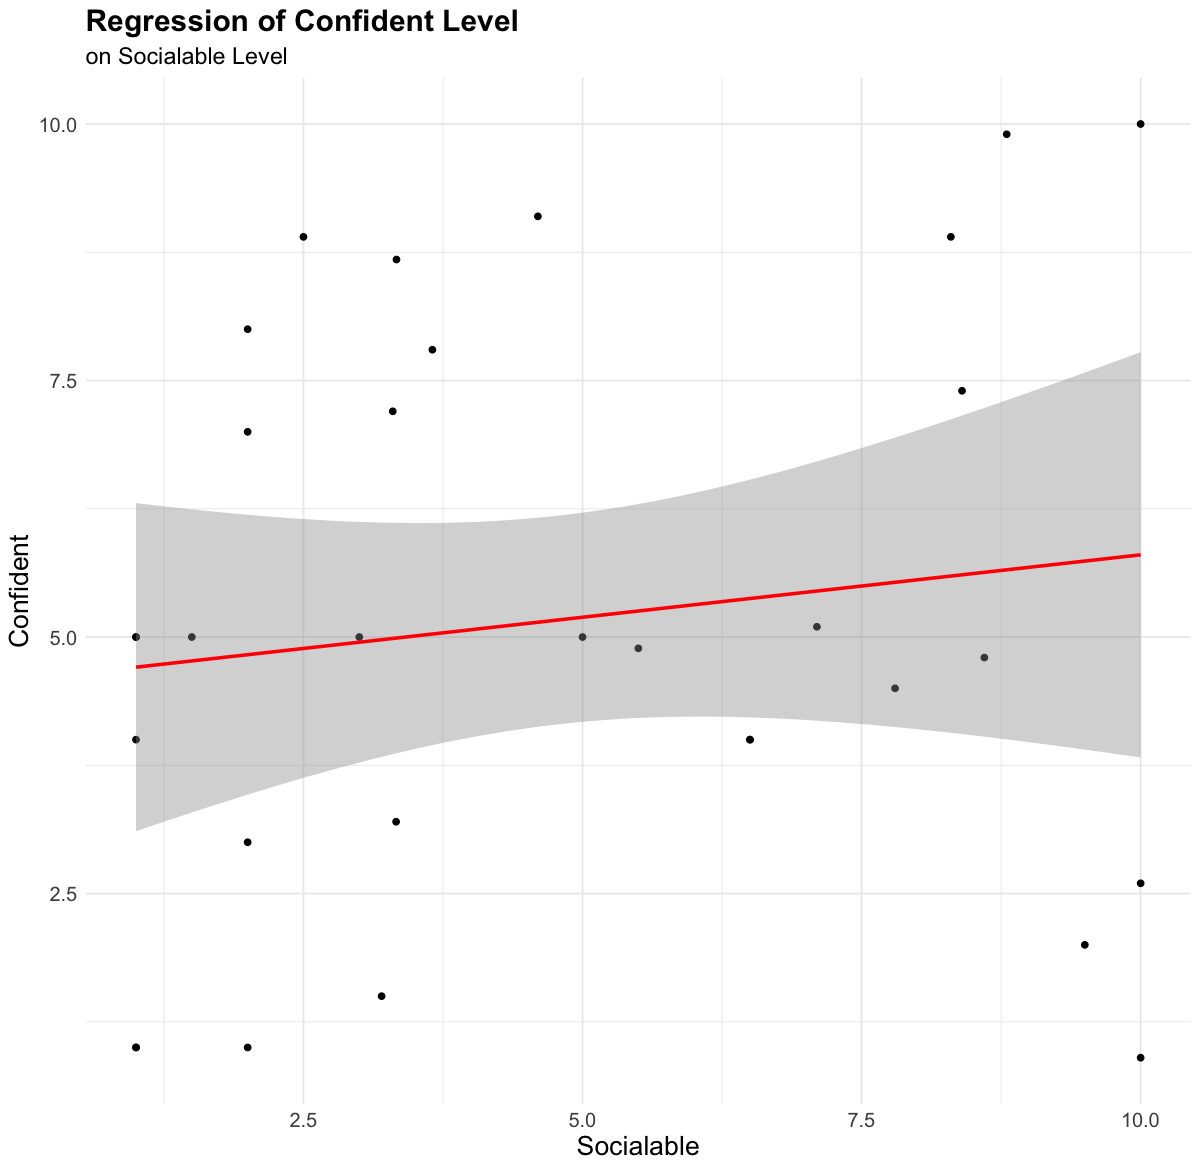

In [22]:
fit_model(personality$SOCIALABLE,personality$CONFIDENT, "Socialable", "Confident")

### SLR Model 2
In my second model, I am interested in studying how well being methodical influences someone's confidence. Running `fit_sum` with the specified arguments, I can make the following observations:
1. **Residuals**: The distribution of residuals is centered around a median close to 0.
2. **Coefficients**: The equation of the fitted line is $~Y = 2.4588 + 0.4091X$. This means when $X = 0$, a person will have a confident level of 2.4588. We can also say for every 1 unit increase in X, there will be a 0.4091 unit increase in someone's confident level.
3. **P-value:** We can also see from the p-value benchmark that `METHODICAL` is a significant indicator of `CONFIDENT`.
4. **Residual standard error**: Model 2 has a residual standard error of 2.583 on 30 degrees of freedom.
5. **Adjusted R-squared**: Model 2 has an adjusted $R^2$ of 0.148. This means that `METHODICAL` accounts for 14.8% of variation in `CONFIDENT`.

In [23]:
slr_mod2 <- fit_sum(METHODICAL, CONFIDENT)
slr_mod2


Call:
lm(formula = yvar ~ xvar, data = personality)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8041 -1.7507 -0.2518  1.6803  4.6777 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   2.4588     1.1652   2.110   0.0433 *
xvar          0.4091     0.1619   2.527   0.0170 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.583 on 30 degrees of freedom
Multiple R-squared:  0.1755,	Adjusted R-squared:  0.148 
F-statistic: 6.386 on 1 and 30 DF,  p-value: 0.01701


To better visualize the SLR model, I ran `fit_model()` with the specified arguments. We can see that there appears to be a slight <ins>positive</ins> linear relationship between someone's confident level and methodical level as indicated in the model summary. This means the greater a person's methodical level, the <ins>greater</ins> their confident level is.

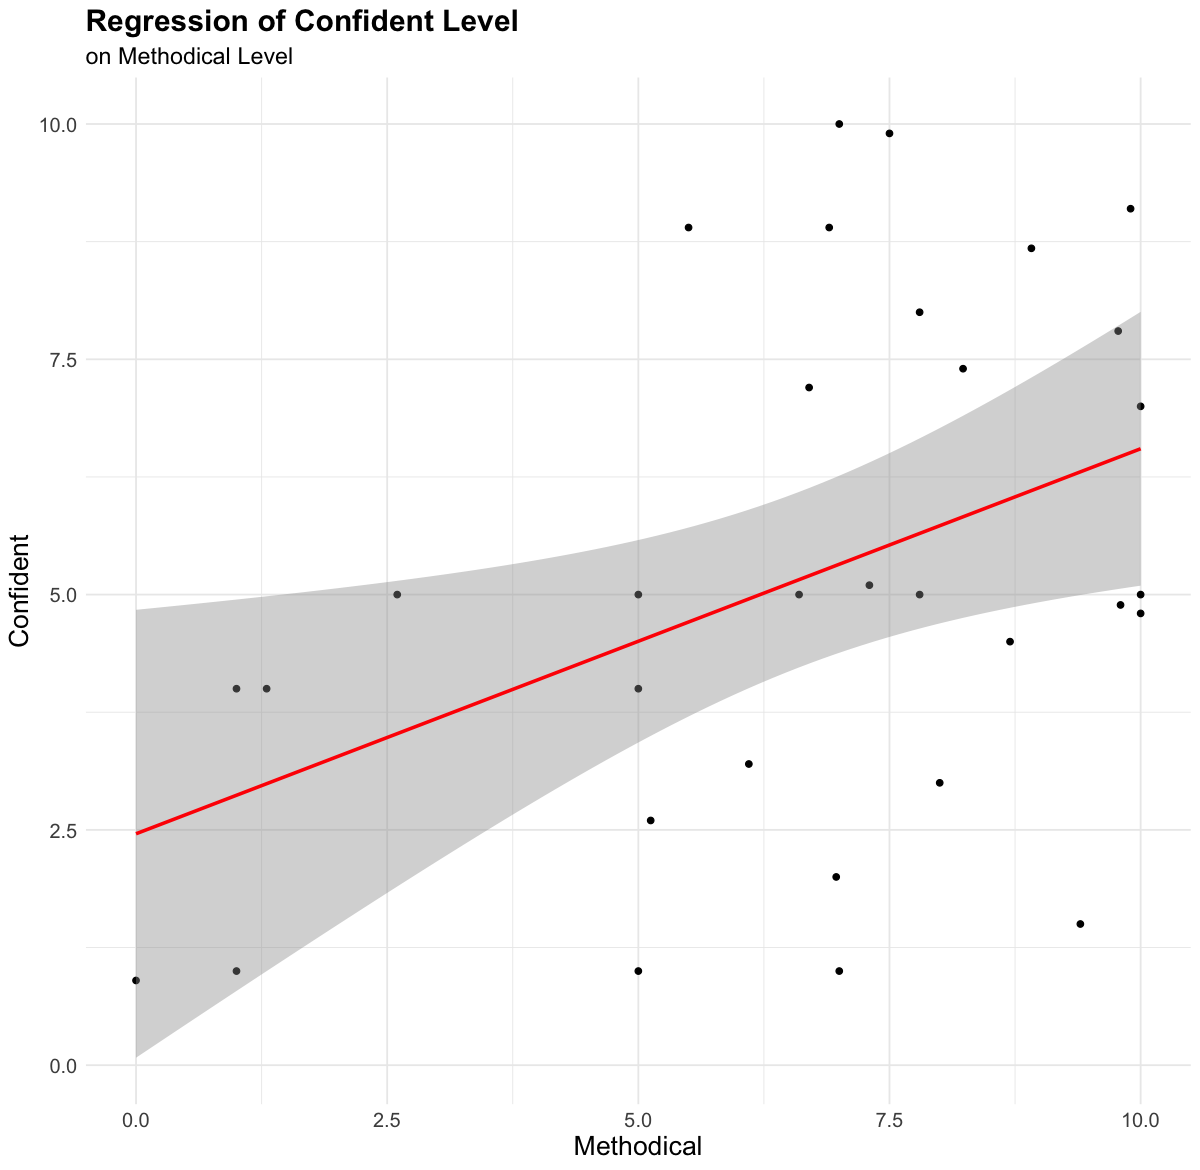

In [24]:
fit_model(personality$METHODICAL,personality$CONFIDENT, "Methodical", "Confident")

### SLR Model 3
In my third model, I am interested in studying how well being selfish influences someone's confidence. Running `fit_sum` with the specified arguments, I can make the following observations:
1. **Residuals**: The distribution of residuals is centered around a median close to 0.
2. **Coefficients**: The equation of the fitted line is $~Y = 6.0288 - 0.2927X$. This means when $X = 0$, a person will have a confident level of 6.0288. We can also say for every 1 unit increase in X, there will be a 0.2927 unit decrease in someone's confident level.
3. **P-value:** We can also see from the p-value benchmark that `SELFISH` is not a significant indicator of `CONFIDENT` alone.
4. **Residual standard error**: Model 3 has a residual standard error of 2.713 on 30 degrees of freedom.
5. **Adjusted R-squared**: Model 3 has an adjusted $R^2$ of 0.06011. This means that `SELFISH` accounts for 6.011% of variation in `CONFIDENT`.

In [25]:
slr_mod3 <- fit_sum(SELFISH, CONFIDENT)
slr_mod3


Call:
lm(formula = yvar ~ xvar, data = personality)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2361 -1.8526 -0.7361  2.1212  4.9492 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.0288     0.6917   8.716 1.02e-09 ***
xvar         -0.2927     0.1695  -1.727   0.0944 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.713 on 30 degrees of freedom
Multiple R-squared:  0.09043,	Adjusted R-squared:  0.06011 
F-statistic: 2.983 on 1 and 30 DF,  p-value: 0.09445


To better visualize the SLR model, I ran `fit_model()` with the specified arguments. Here, we can see that there appears to be a slight <ins>negative</ins> linear relationship between someone's confident level and selfish level as indicated in the model summary. This means the greater a person's selfish level, the <ins>lower</ins> their confident level is.

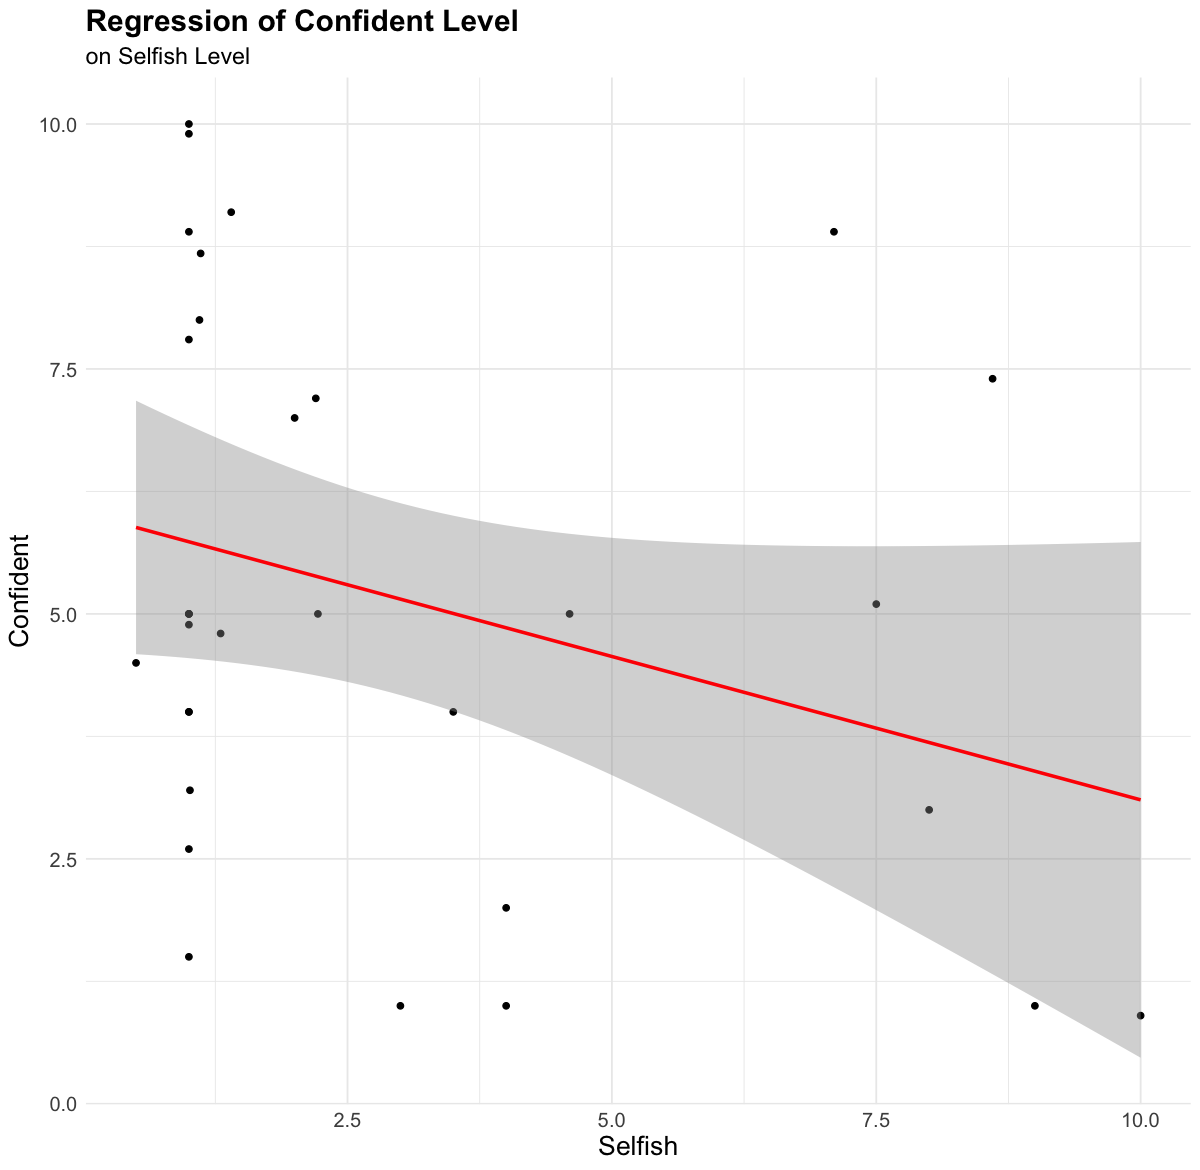

In [26]:
fit_model(personality$SELFISH,personality$CONFIDENT, "Selfish", "Confident")

### SLR Model 4
In my fourth model, I am interested in studying how well being goal oriented influences someone's confidence. Running `fit_sum` with the specified arguments, I can make the following observations:
1. **Residuals**: The distribution of residuals is centered around a median close to 0.
2. **Coefficients**: The equation of the fitted line is $~Y = 2.7818 + 0.3799X$. This means when $X = 0$, a person will have a confident level of 2.7818. We can also say for every 1 unit increase in X, there will be a 0.3799 unit increase in someone's confident level.
3. **P-value:** We can also see from the p-value benchmark that `GOAL.ORIENTED` is not a significant indicator of `CONFIDENT` alone.
4. **Residual standard error**: Model 4 has a residual standard error of 2.702 on 30 degrees of freedom.
5. **Adjusted R-squared**: Model 4 has an adjusted $R^2$ of 0.06772. This means that `GOAL.ORIENTED` accounts for 6.772% of variation in `CONFIDENT`.

In [27]:
slr_mod4 <- fit_sum(GOAL.ORIENTED, CONFIDENT)
slr_mod4


Call:
lm(formula = yvar ~ xvar, data = personality)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8213 -1.7157 -0.1865  2.3805  4.2945 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   2.7818     1.4066   1.978   0.0572 .
xvar          0.3799     0.2107   1.803   0.0814 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.702 on 30 degrees of freedom
Multiple R-squared:  0.0978,	Adjusted R-squared:  0.06772 
F-statistic: 3.252 on 1 and 30 DF,  p-value: 0.08139


To better visualize the SLR model, I ran `fit_model()` with the specified arguments. Here, we can see that there appears to be a slight <ins>postive</ins> linear relationship between someone's goal oriented level and selfish level as indicated in the model summary. This means the greater a person's goal oriented level, the <ins>greater</ins> their confident level is.

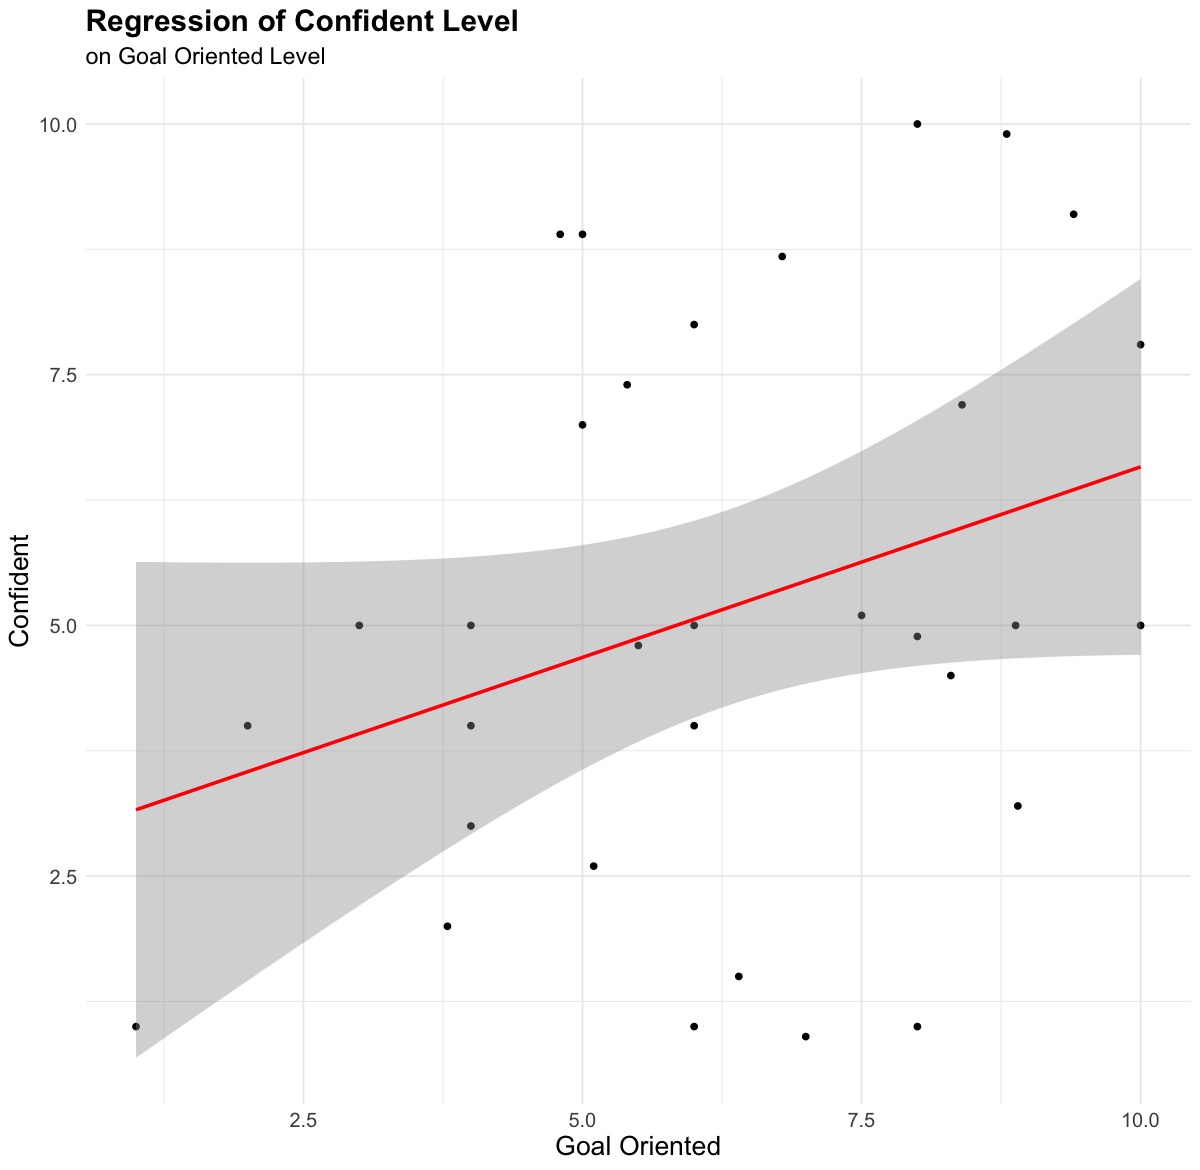

In [28]:
fit_model(personality$GOAL.ORIENTED,personality$CONFIDENT, "Goal Oriented", "Confident")

### SLR Model 5
In my last model, I am interested in studying how well being revengeful influences someone's confidence. Running `fit_sum` with the specified arguments, I can make the following observations:
1. **Residuals**: The distribution of residuals is centered around a median close to 0.
2. **Coefficients**: The equation of the fitted line is $~Y = 5.6889 - 0.1071X$. This means when $X = 0$, a person will have a confident level of 5.6889. We can also say for every 1 unit increase in X, there will be a 0.1071 unit sdecrease in someone's confident level.
3. **P-value:** We can also see from the p-value benchmark that `REVENGEFUL` is not a significant indicator of `CONFIDENT` alone.
4. **Residual standard error**: Model 5 has a residual standard error of 2.82 on 30 degrees of freedom.
5. **Adjusted R-squared**: Model 5 has an adjusted $R^2$ of -0.01554. The negative value means that the regression line is worse than using the mean value of `CONFIDENT` to predict someone's confident level.

In [29]:
slr_mod5 <- fit_sum(REVENGEFUL, CONFIDENT)
slr_mod5


Call:
lm(formula = yvar ~ xvar, data = personality)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0603 -2.3684 -0.2014  2.3173  5.2825 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.6889     0.8747   6.504 3.44e-07 ***
xvar         -0.1071     0.1478  -0.725    0.474    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.82 on 30 degrees of freedom
Multiple R-squared:  0.01722,	Adjusted R-squared:  -0.01554 
F-statistic: 0.5256 on 1 and 30 DF,  p-value: 0.4741


To better visualize the SLR model, I ran `fit_model()` with the specified arguments. Here, we can see that there does <ins>not</ins> appear to be a strong linear relationship between someone's revengeful level and sociable level as indicated in the model summary.

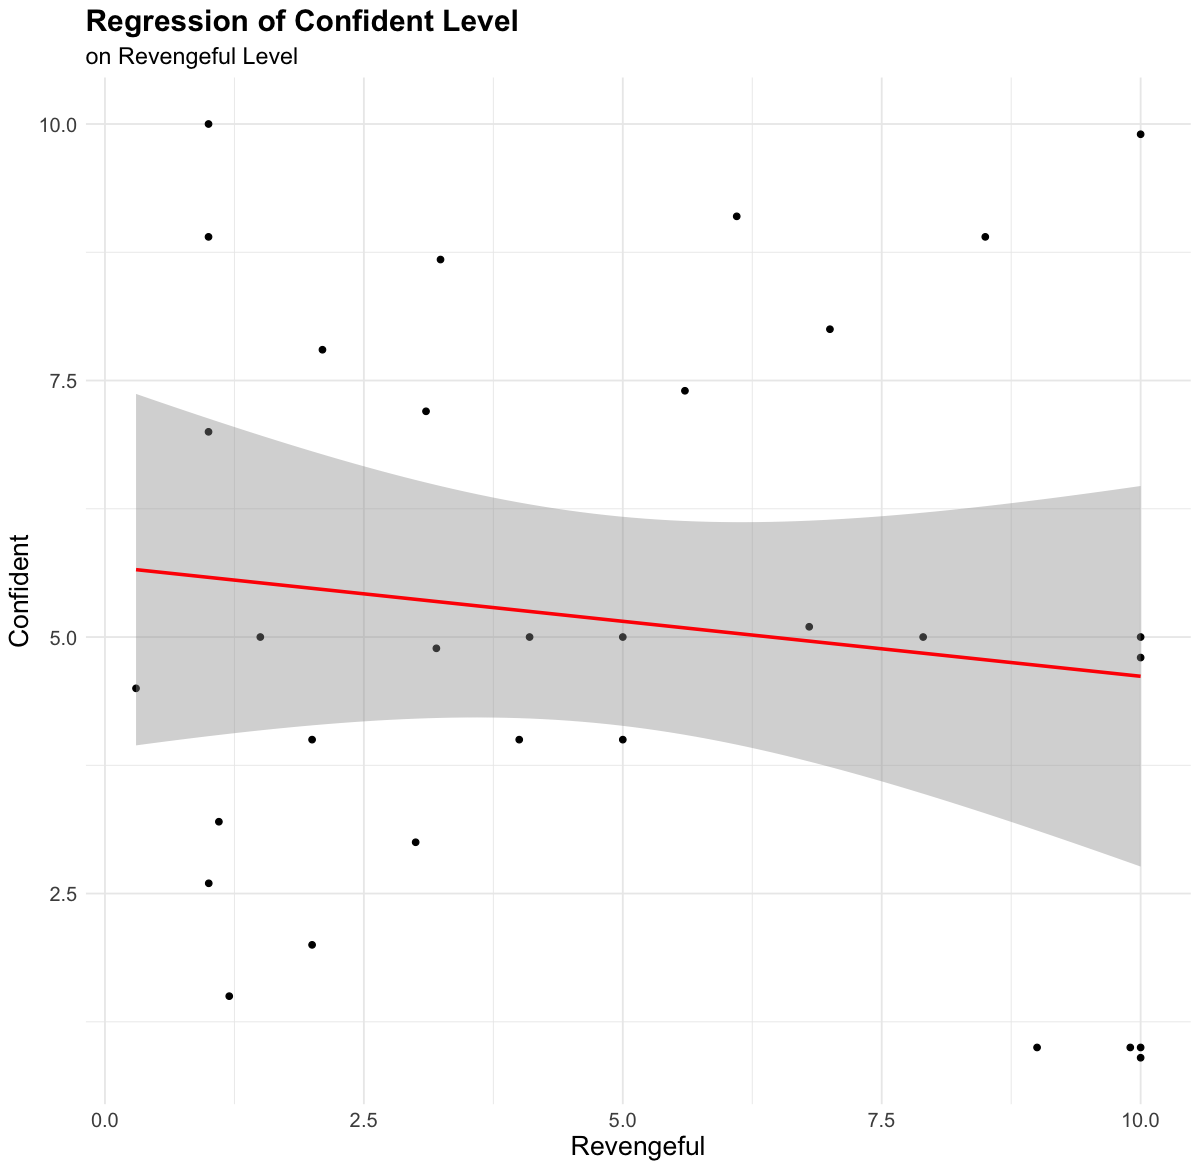

In [30]:
fit_model(personality$REVENGEFUL,personality$CONFIDENT, "Revengeful", "Confident")

## Model Comparison  <a id='model-comparison'></a>
---
Because neither `SOCIALABLE` and `REVENGEFUL` a linear relationship with `CONFIDENT`, it is safe to rule them out as significant predictors of someone's confident level. In comparing the remaining 3 models, we can see a positive linear relationship in both Module 2 (`CONFIDENT` on `METHODICAL`) and Module 4 (`CONFIDENT` on `GOAL.ORIENTED`), while Module 3 exhibits a negative linear relationship (`CONFIDENT` on `SELFISH`). To identify the best model out the 3, we select the independent variable that explains the most variation of the dependent variable, `CONFIDENT`, e.g. the model with the highest adjusted $R^2$ value. Based on this criteria, we can conclude that Module 2 (`CONFIDENT` on `METHODICAL`) is the best model with an adjusted $R^2$ value of 0.1480286. This means that `METHODICAL` accounts for 14.8% of variation in `CONFIDENT`. Because the proportion is fairly low, it is possible that the variation in someone's confident level is dependent on more than just one variable. We can try to add more variables to build a multiple linear regression model that could possible deliver a greater adjusted $R^2$ value in the following section.

In [19]:
cat("Adjusted R-squared of slr_mod2:", slr_mod2$adj.r.squared, "\nAdjusted R-squared of slr_mod3:", 
    slr_mod3$adj.r.squared, "\nAdjusted R-squared of slr_mod4:", slr_mod4$adj.r.squared)

Adjusted R-squared of slr_mod2: 0.1480286 
Adjusted R-squared of slr_mod3: 0.06011139 
Adjusted R-squared of slr_mod4: 0.06772457

## Multiple Linear Regression  <a id='multiple-linear-regression'></a>
---

### MLR Model 1

In my first model, I am interested in studying how well `DETAIL.ORIENTED`, `AFFECTIONATE`, `METHODICAL`, and `INTROVERT` influence someone's confidence. Running `lm()` on the specified variables and printing the summary, I can make the following observations:
1. **Residuals**: The distribution of residuals is centered around a median close to 0.
2. **Coefficients**: The equation of the fitted line is <br><br>$$~Y = -0.02369 - 0.45722X_1 + 0.41523X_2 + 0.40954X_3 + 0.28809X_4$$<br> This means when $X_1, ..., X_4 = 0$, a person will have a confident level of -0.02369. We can also say for every one unit increase in either $X_1, X_2, X_3$, or $X_4$, there will be an increase/decrease in someone's confident level in the value of the corresponding slope.
3. **P-value:** We can also see from the p-value benchmark that every variable is a significant indicator of `CONFIDENT`.
4. **Residual standard error**: Model 1 has a residual standard error of 2.126 on 27 degrees of freedom.
5. **Adjusted R-squared**: Model 1 has an adjusted $R^2$ of 0.4225. This means that MLR model 1 accounts for 42.25% of variation in `CONFIDENT`.

In [20]:
mlr_mod1 <- lm(CONFIDENT ~ DETAIL.ORIENTED + AFFECTIONATE + METHODICAL + INTROVERT, data = personality)
summary(mlr_mod1)


Call:
lm(formula = CONFIDENT ~ DETAIL.ORIENTED + AFFECTIONATE + METHODICAL + 
    INTROVERT, data = personality)

Residuals:
   Min     1Q Median     3Q    Max 
-4.851 -1.390  0.518  1.503  2.654 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)       0.1133     1.4850   0.076  0.93975   
DETAIL.ORIENTED  -0.4808     0.1470  -3.271  0.00293 **
AFFECTIONATE      0.4259     0.1600   2.662  0.01293 * 
METHODICAL        0.3945     0.1439   2.741  0.01073 * 
INTROVERT         0.2823     0.1327   2.128  0.04260 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.09 on 27 degrees of freedom
Multiple R-squared:  0.5142,	Adjusted R-squared:  0.4422 
F-statistic: 7.145 on 4 and 27 DF,  p-value: 0.0004645


### MLR Model 2

In my second model, I am interested in studying how well `VIBRANT`, `TEAM.PLAYER`, `DETAIL.ORIENTED`, `METHODICAL`, and `INTROVERT` influence someone's confidence. Running `lm()` on the specified variables and printing the summary, I can make the following observations:
1. **Residuals**: The distribution of residuals is centered around a median close to 0.
2. **Coefficients**: The equation of the fitted line is <br><br>$$~Y = -0.4626 + 0.6161X_1 - 0.4424X_2 - 0.5928X_3 + 0.6492X_4 + 0.3589X_5$$<br> This means when $X_1, ..., X_5 = 0$, a person will have a confident level of -0.4626. We can also say for every one unit increase in either $X_1, X_2, X_3, X_4$, or $X_5$, there will be an increase/decrease in someone's confident level in the value of the corresponding slope.
3. **P-value:** We can also see from the p-value benchmark that every variable is a significant indicator of `CONFIDENT`.
4. **Residual standard error**: Model 2 has a residual standard error of 1.909 on 26 degrees of freedom.
5. **Adjusted R-squared**: Model 2 has an adjusted $R^2$ of 0.5343. This means that MLR model 2 accounts for 53.43% of variation in `CONFIDENT`.

In [21]:
mlr_mod2 <- lm(CONFIDENT ~ VIBRANT + TEAM.PLAYER + DETAIL.ORIENTED + METHODICAL + INTROVERT, data = personality)
summary(mlr_mod2)


Call:
lm(formula = CONFIDENT ~ VIBRANT + TEAM.PLAYER + DETAIL.ORIENTED + 
    METHODICAL + INTROVERT, data = personality)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5551 -1.0601 -0.1790  0.8508  3.9906 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.1023     1.7319   0.059  0.95335    
VIBRANT           0.5534     0.1996   2.773  0.01014 *  
TEAM.PLAYER      -0.4413     0.1290  -3.420  0.00208 ** 
DETAIL.ORIENTED  -0.5919     0.1444  -4.100  0.00036 ***
METHODICAL        0.6218     0.1301   4.780 6.01e-05 ***
INTROVERT         0.3461     0.1219   2.839  0.00866 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.913 on 26 degrees of freedom
Multiple R-squared:  0.6081,	Adjusted R-squared:  0.5327 
F-statistic: 8.069 on 5 and 26 DF,  p-value: 0.0001056


### MLR Model 3

In my third model, I am interested in studying how well `VIBRANT`, `REMORSEFUL`, `TEAM.PLAYER`, `DETAIL.ORIENTED`, `METHODICAL`, and `SENSE.EXPERIENCED` influence someone's confidence. Running `lm()` on the specified variables and printing the summary, I can make the following observations:
1. **Residuals**: The distribution of residuals is centered around a median close to 0.
2. **Coefficients**: The equation of the fitted line is <br><br>$$~Y = 0.1557 + 0.5518X_1 + 0.4473X_2 - 0.3793X_3 - 0.5419X_4 + 0.5888X_5 - 0.2446X_6$$<br> This means when $X_1, ..., X_6 = 0$, a person will have a confident level of 0.1557. We can also say for every one unit increase in either $X_1, X_2, X_3, X_4, X_5$, or $X_6$, there will be an increase/decrease in someone's confident level in the value of the corresponding slope.
3. **P-value:** We can also see from the p-value benchmark that every variable, aside from `SENSE.EXPERIENCED` is a significant indicator of `CONFIDENT`.
4. **Residual standard error**: Model 3 has a residual standard error of 1.847 on 25 degrees of freedom.
5. **Adjusted R-squared**: Model 3 has an adjusted $R^2$ of 0.5644. This means that MLR model 3 accounts for 56.44% of variation in `CONFIDENT`.

In [22]:
mlr_mod3 <- lm(CONFIDENT ~ VIBRANT + REMORSEFUL + TEAM.PLAYER + DETAIL.ORIENTED + METHODICAL + SENSE.EXPERIENCED, 
           data = personality)
summary(mlr_mod3)


Call:
lm(formula = CONFIDENT ~ VIBRANT + REMORSEFUL + TEAM.PLAYER + 
    DETAIL.ORIENTED + METHODICAL + SENSE.EXPERIENCED, data = personality)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0629 -0.9394  0.0339  0.6662  3.3686 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.5897     1.7337   0.340 0.736608    
VIBRANT             0.5009     0.1869   2.680 0.012852 *  
REMORSEFUL          0.4679     0.1287   3.636 0.001255 ** 
TEAM.PLAYER        -0.3880     0.1207  -3.214 0.003593 ** 
DETAIL.ORIENTED    -0.5720     0.1357  -4.215 0.000285 ***
METHODICAL          0.5704     0.1228   4.645 9.35e-05 ***
SENSE.EXPERIENCED  -0.2502     0.1310  -1.910 0.067727 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.789 on 25 degrees of freedom
Multiple R-squared:  0.6702,	Adjusted R-squared:  0.591 
F-statistic: 8.467 on 6 and 25 DF,  p-value: 4.496e-05


### MLR Model 4

In my fourth model, I am interested in studying how well `VIBRANT`, `REMORSEFUL`, `SELF.ASSERTING`, `TEAM.PLAYER`, `DETAIL.ORIENTED`, `METHODICAL`, and `SENSE.EXPERIENCED` influence someone's confidence. Running `lm()` on the specified variables and printing the summary, I can make the following observations:
1. **Residuals**: The distribution of residuals is centered around a median close to 0.
2. **Coefficients**: The equation of the fitted line is <br><br>$$~Y = -2.2294 + 0.6608X_1 + 0.5224X_2 +  0.2650X_3 - 0.3738X_4 - 0.5009X_5 + 0.5918X_6 - 0.3186X_7$$<br> This means when $X_1, ..., X_7 = 0$, a person will have a confident level of -2.2294. We can also say for every one unit increase in either $X_1, X_2, X_3, X_4, X_5, X_6$, or $X_7$, there will be an increase/decrease in someone's confident level in the value of the corresponding slope.
3. **P-value:** We can also see from the p-value benchmark that every variable is a significant indicator of `CONFIDENT`.
4. **Residual standard error**: Model 4 has a residual standard error of 1.695 on 24 degrees of freedom.
5. **Adjusted R-squared**: Model 4 has an adjusted $R^2$ of 0.6329. This means that MLR model 4 accounts for 63.29% of variation in `CONFIDENT`.

In [23]:
mlr_mod4 <- lm(CONFIDENT ~ VIBRANT + REMORSEFUL + SELF.ASSERTING + TEAM.PLAYER + DETAIL.ORIENTED + METHODICAL + 
           SENSE.EXPERIENCED, data = personality)
summary(mlr_mod4)


Call:
lm(formula = CONFIDENT ~ VIBRANT + REMORSEFUL + SELF.ASSERTING + 
    TEAM.PLAYER + DETAIL.ORIENTED + METHODICAL + SENSE.EXPERIENCED, 
    data = personality)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1281 -0.6936 -0.3548  0.9699  2.6982 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -1.9917     1.7934  -1.111 0.277752    
VIBRANT             0.6276     0.1718   3.652 0.001262 ** 
REMORSEFUL          0.5499     0.1178   4.668 9.67e-05 ***
SELF.ASSERTING      0.2892     0.1035   2.794 0.010069 *  
TEAM.PLAYER        -0.3895     0.1070  -3.640 0.001303 ** 
DETAIL.ORIENTED    -0.5479     0.1206  -4.542 0.000133 ***
METHODICAL          0.5826     0.1089   5.348 1.73e-05 ***
SENSE.EXPERIENCED  -0.3285     0.1195  -2.749 0.011185 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.586 on 24 degrees of freedom
Multiple R-squared:  0.7511,	Adjusted R-squared:  0.6786 
F-statistic:

### MLR Model 5

In my fifth model, I am interested in studying how well `LAID.BACK`, `REMORSEFUL`, `DETAIL.ORIENTED`, `AFFECTIONATE`, `GOAL.ORIENTED`, `NON.PHILOSOPHICAL`, `VULNERABLE`, and `SENTIMENTAL` influence someone's confidence. Running `lm()` on the specified variables and printing the summary, I can make the following observations:
1. **Residuals**: The distribution of residuals is centered around a median close to 0.
2. **Coefficients**: The equation of the fitted line is <br><br>$$~Y = 5.7576 - 0.3384X_1 + 0.5604X_2 - 0.8235X_3 + 0.6033X_4 + 0.5619X_5 - 0.6828X_6 - 0.3707X_7 - 0.2216X_8$$<br> This means when $X_1, ..., X_8 = 0$, a person will have a confident level of 5.7576. We can also say for every one unit increase in either $X_1, X_2, X_3, X_4, X_5, X_6, X_7$, or $X_8$, there will be an increase/decrease in someone's confident level in the value of the corresponding slope.
3. **P-value:** We can also see from the p-value benchmark that every variable, except for `SENTIMENTAL` is a significant indicator of `CONFIDENT`.
4. **Residual standard error**: Model 5 has a residual standard error of 1.632 on 23 degrees of freedom.
5. **Adjusted R-squared**: Model 5 has an adjusted $R^2$ of 0.6597. This means that MLR model 5 accounts for 65.97% of variation in `CONFIDENT`.

In [31]:
mlr_mod5 <- lm(CONFIDENT ~ LAID.BACK + REMORSEFUL + DETAIL.ORIENTED + AFFECTIONATE + GOAL.ORIENTED + NON.PHILOSOPHICAL
               + VULNERABLE + SENTIMENTAL, data = personality)
summary(mlr_mod5)


Call:
lm(formula = CONFIDENT ~ LAID.BACK + REMORSEFUL + DETAIL.ORIENTED + 
    AFFECTIONATE + GOAL.ORIENTED + NON.PHILOSOPHICAL + VULNERABLE + 
    SENTIMENTAL, data = personality)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5256 -1.1655  0.1551  1.4074  2.3288 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)         4.7523     2.1045   2.258 0.033732 *  
LAID.BACK          -0.2626     0.1138  -2.307 0.030390 *  
REMORSEFUL          0.5630     0.1360   4.141 0.000396 ***
DETAIL.ORIENTED    -0.7487     0.1453  -5.152  3.2e-05 ***
AFFECTIONATE        0.5789     0.1379   4.199 0.000343 ***
GOAL.ORIENTED       0.4657     0.1411   3.301 0.003121 ** 
NON.PHILOSOPHICAL  -0.6124     0.1361  -4.501 0.000162 ***
VULNERABLE         -0.2844     0.1120  -2.540 0.018304 *  
SENTIMENTAL        -0.2106     0.1180  -1.785 0.087424 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.712 on 23 degrees of fre

### Model Comparison pt. 2

Similar to the SLR Model Comparison, in identifying the best MLR model, we select the model that explains the most variation of the dependent variable, `CONFIDENT`, e.g. the model with the highest adjusted $R^2$ value. The adjusted $R^2$ values of the 5 MLR models are as follows:

In [25]:
cat("Adjusted R-squared of mlr_mod1:", summary(mlr_mod1)$adj.r.squared, "\nAdjusted R-squared of mlr_mod2:", 
    summary(mlr_mod2)$adj.r.squared, "\nAdjusted R-squared of mlr_mod3:", summary(mlr_mod3)$adj.r.squared, 
    "\nAdjusted R-squared of mlr_mod4:", summary(mlr_mod4)$adj.r.squared, "\nAdjusted R-squared of mlr_mod5:", 
    summary(mlr_mod5)$adj.r.squared)

Adjusted R-squared of mlr_mod1: 0.4422408 
Adjusted R-squared of mlr_mod2: 0.5327429 
Adjusted R-squared of mlr_mod3: 0.5910427 
Adjusted R-squared of mlr_mod4: 0.6785563 
Adjusted R-squared of mlr_mod5: 0.6255233

From above, we can conclude that MLR Model 5 is the best model with the highest $R^2$ value. Another observation that can be made from comparing the summary print outs is that the residual standard error decreased as our model improved. Typically we want to minimize the residual standard error so that is a very good sign. Now let's compare MLR Model 5 with the best model we found from our SLR, SLR Model 2.

In [26]:
cat("Adjusted R-squared of mlr_mod5:", summary(mlr_mod5)$adj.r.squared, "\nAdjusted R-squared of slr_mod2:", 
    slr_mod2$adj.r.squared)

Adjusted R-squared of mlr_mod5: 0.6255233 
Adjusted R-squared of slr_mod2: 0.1480286

There is a significant improvement in the $R^2$ value when using more than one variable to explain the variation in `CONFIDENT`. We can conclude that MLR Model 5 is indeed the best model out of all the models tested.

## Summary  <a id='summary'></a>
---
In deciding what kind of psychological and counseling services are neccessary to help student's build the confidence to achieve academically, socially, and personally, it is essential to **listen and respond to student needs**. Recently, the San Francisco County Office of Education conducted a study to analyze certain behaviors on college students. With this study, I was able to use the data to build a prediction model, with linear regression, that can predict what variables contribute to a student's confidence.

Before I could build any model, however, it was essential that I first cleansed my data of any incomplete, inaccurate, or unreasonable data. I decided that for any missing values or for any values above the threshold of 10 I would replace these inputs with the balanced value of 5. Because I could not tell if students intended to put a 10 or accidentally misplaced decimal points, I decided to use the value 5 so that it would not skew my data in any way. Additionally, I decided to replace all values below the threshold of 0 with 0. This seemed reasonable for any negative value. Although there weren't any, this would still help cleanse any other future survey data.

After data cleansing, I began to build my simple linear regression models. Using the variables `SOCIALABLE`, `METHODICAL`, `SELFISH`, `GOAL.ORIENTED`, and `REVENGEFUL`, I created 5 different SLR models to see how well each variable influenced a student's confidence. I found that `METHODICAL` did the best at explaining the variation in our response variable, `CONFIDENT`, with an $R^2$ of 0.148. This $R^2$ seemed faily low, however, so I decided to add some more variables to the model to build a multiple linear regression that could possibly deliver a better $R^2$ value. After some testing, I found that the model with the variables `LAID.BACK`, `REMORSEFUL`, `DETAIL.ORIENTED`, `AFFECTIONATE`, `GOAL.ORIENTED`, `NON.PHILOSOPHICAL`, `VULNERABLE`, and `SENTIMENTAL` best predicts a student's confidence with an $R^2$ of 0.6597, a significant improvement from our SLR model. These are the variables that influence a student's confidence and can help the San Francisco County Office of Education identify the kind of services they should provide to their students.

## Recommendations  <a id='recommendations'></a>
---
When analyzing certain behaviors on college students, we can build a prediction model, using linear regression, that can predict what variables influence a student's confidence. Based on the analysis and findings, the model that best predicts a student's confidence includes the variables `LAID.BACK`, `REMORSEFUL`, `DETAIL.ORIENTED`, `AFFECTIONATE`, `GOAL.ORIENTED`, `NON.PHILOSOPHICAL`, `VULNERABLE`, and `SENTIMENTAL`.

Out of the eight variables, we can see a positive linear relationship between `CONFIDENT` and `REMORSEFUL`, `AFFECTIONATE`, and `GOAL.ORIENTED`. This means that as these three variables increase, we can also see an increase in a student's confidence. Knowing this, I'd recommend San Francisco County's representatives to provide services that would help students build this traits so that they can see an improvement in their students' confidence.

Out of the eight variables, we can see a negative linear relationship between `CONFIDENT` and `LAID.BACK`, `DETAIL.ORIENTED`, `NON.PHILOSOPHICAL`, `VULNERABLE`, and `SENTIMENTAL`. In other words, as these five variables increase, we can see an decrease in a student's confidence. Knowing this, I'd recommend San Francisco County's representatives to provide services that would help students mitigate this traits so that they can see an improvement in their students' confidence.